In [67]:
import pandas as pd
import json

# Load the datasets
behaviors_df = pd.read_parquet('../data/eb_nerd/train/behaviors.parquet')
history_df = pd.read_parquet('../data/eb_nerd/train/history.parquet')
articles_df = pd.read_parquet('../data/eb_nerd/train/articles.parquet')

articles_df.head(10)

,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,...,entity_groups,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label
0,3037230,Ishockey-spiller: Jeg troede jeg skulle dø,ISHOCKEY: Ishockey-spilleren Sebastian Harts h...,2023-06-29 06:20:57,False,Ambitionerne om at komme til USA og spille ish...,2003-08-28 08:55:00,None,article_default,https://ekstrabladet.dk/sport/anden_sport/isho...,...,[],"[Kriminalitet, Kendt, Sport, Katastrofe, Mindr...",142,"[327, 334]",sport,NaN,NaN,NaN,0.9752,Negative
1,3044020,Prins Harry tvunget til dna-test,Hoffet tvang Prins Harry til at tage dna-test ...,2023-06-29 06:21:16,False,Den britiske tabloidavis The Sun fortsætter me...,2005-06-29 08:47:00,"[3097307, 3097197, 3104927]",article_default,https://ekstrabladet.dk/underholdning/udlandke...,...,"[PER, PER]","[Kriminalitet, Kendt, Underholdning, Personfar...",414,[432],underholdning,NaN,NaN,NaN,0.7084,Negative
2,3057622,Rådden kørsel på blå plader,Kan ikke straffes: Udenlandske diplomater i Da...,2023-06-29 06:21:24,False,Slingrende spritkørsel. Grove overtrædelser af...,2005-10-10 07:20:00,[3047102],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,[],"[Kriminalitet, Transportmiddel, Bil]",118,[133],nyheder,NaN,NaN,NaN,0.9236,Negative
3,3073151,Mærsk-arvinger i livsfare,FANGET I FLODBØLGEN: Skibsrederens oldebørn må...,2023-06-29 06:21:38,False,To oldebørn af skibsreder Mærsk McKinney Mølle...,2005-01-04 06:59:00,"[3067474, 3067478, 3153705]",article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,...,[],"[Erhverv, Privat virksomhed, Livsstil, Familie...",118,[133],nyheder,NaN,NaN,NaN,0.9945,Negative
4,3193383,Skød svigersøn gennem babydyne,44-årig kvinde tiltalt for drab på ekssvigersø...,2023-06-29 06:22:57,False,En 44-årig mormor blev i dag fremstillet i et ...,2003-09-15 15:30:00,None,article_default,https://ekstrabladet.dk/krimi/article3193383.ece,...,[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9966,Negative
5,3196611,Zoo-tårnet 100 år,"I mange år var det god latin at vide, at højde...",2023-06-29 06:23:02,False,"I mange år var det god latin at vide, at højde...",2005-06-10 05:40:00,"[3067931, 3035588]",article_default,https://ekstrabladet.dk/ferie/article3196611.ece,...,[],"[Kultur, Museum og seværdighed]",539,[],ferie,NaN,NaN,NaN,0.6275,Neutral
6,3200325,Tævet ihjel på tre kvarter,Sadomasochistisk sex-guru: - Hun var en slavet...,2023-06-29 06:23:13,False,.\nSkolepige vil giftes med guru\n.\nKnus og k...,2002-06-25 05:10:00,"[3200179, 3186817]",article_default,https://ekstrabladet.dk/krimi/article3200325.ece,...,[],"[Kriminalitet, Livsstil, Personfarlig kriminal...",140,[],krimi,NaN,NaN,NaN,0.9913,Negative
7,3200913,Denne kæp kan fælde voldtægtsmand,Nye spor i den bestialske voldtægtssag i Århus,2023-06-29 06:23:15,False,"Den usædvanlig grove voldtægt, der blev begået...",2003-09-11 08:55:00,None,article_default,https://ekstrabladet.dk/krimi/article3200913.ece,...,[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9839,Negative
8,3209311,Morder truer med nyt drab,En morder er blevet varetægtsfængslet for at h...,2023-06-29 06:23:35,False,En morder er i retten i Kolding blevet varetæg...,2003-03-20 12:50:00,None,article_default,https://ekstrabladet.dk/krimi/article3209311.ece,...,[PER],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9975,Negative
9,3209357,Pædofil må stadig undervise børn,Lærer havde 700 børnepornobilleder på sin comp...,2023-06-29 06:23:35,False,En 56-årig sønderjysk lærer må stadig undervis...,2005-02-26 04:45:00,[3069815],article_default,https://ekstrabladet.dk/krimi/article3209357.ece,...,[],"[Kriminalitet, Personfarlig kriminalitet, Offe...",140,[],krimi,NaN,NaN,NaN,0.7929,Negative


In [38]:
articles_df.head(10)

# Create a mapping from article_id to title
article_id_to_title = dict(zip(articles_df['article_id'].astype(str), articles_df['title']))

In [76]:
import pickle
import pandas as pd

# Assuming `history_df` and `behaviors_df` are your dataframes
# and `article_id_to_title` is your dictionary for mapping article IDs to titles

# Create train_infor_his with article titles
train_infor_his = {}
for _, row in history_df.iterrows():
    user_id = str(row['user_id'])
    clicked_articles_titles = [article_id_to_title.get(str(article), str(article)) for article in row['article_id_fixed']]  # Replace with titles
    train_infor_his[user_id] = clicked_articles_titles

# Save train_infor_his to a pickle file
with open('../data/eb_nerd/formatted/train_infor_his.pkl', 'wb') as f:
    pickle.dump(train_infor_his, f)


# Print the first few entries to verify
print("train_infor_his sample:", list(train_infor_his.items())[:1])


train_infor_his sample: [('13538', ['Coop nedlægger 180 stillinger efter historisk underskud', 'Flere hundrede danske fodboldbaner skal laves om', 'Coop nedlægger 180 stillinger efter historisk underskud', 'Giga-handel går i vasken', 'Coop nedlægger 180 stillinger efter historisk underskud', 'Kaos i Brøndby: Forhandlinger brudt sammen', 'Coop nedlægger 180 stillinger efter historisk underskud', 'Ikonisk café drejer nøglen om', 'Coop nedlægger 180 stillinger efter historisk underskud', 'Efter brat afsked: Mister 700.000 seere', 'Coop nedlægger 180 stillinger efter historisk underskud', 'Grisetransport væltet og brudt i brand', 'Dansktalende kvinde i syrisk fangelejr: - Det er ren overlevelse', 'Sigtelse: Mand holdt ung kvinde fanget og slog hende', 'Konkurs: Umådeligt ked af det', 'Gældsstyrelsen udbetaler godtgørelse: 57.750 kroner pr. person', 'Fire personer tiltalt i Frank-sagen', 'Tv-vært Jerry Springer er død', 'Ærlig McD: Færre fritter', 'EU strammer grebet: Disse 19 giganter bliv

In [75]:
# Create train_interaction with article IDs
train_interaction = []
for _, row in behaviors_df.iterrows():
    user_id = str(row['user_id'])
    clicked_articles = row['article_ids_clicked']
    inview_articles = row['article_ids_inview']
    
    # Check if both clicked_articles and inview_articles are not empty
    if pd.notna(clicked_articles).any() and pd.notna(inview_articles).any():
        clicked_articles_ids = [str(article) for article in clicked_articles if pd.notna(article)]
        inview_articles_ids = [str(article) for article in inview_articles if pd.notna(article)]
        for clicked in clicked_articles_ids:
            for non_clicked in inview_articles_ids:
                if non_clicked not in clicked_articles_ids:
                    train_interaction.append((user_id, clicked, non_clicked))

# Save train_interaction to a pickle file
with open('../data/eb_nerd/formatted/train_interaction.pkl', 'wb') as f:
    pickle.dump(train_interaction, f)

print("train_interaction sample:", train_interaction[:5])

train_interaction sample: [('22779', '9759966', '9774516'), ('22779', '9759966', '9771051'), ('22779', '9759966', '9770028'), ('22779', '9759966', '9775402'), ('22779', '9759966', '9774461')]


In [72]:
# create news_infor.pkl

news_infor = {}
for _, row in articles_df.iterrows():
    article_id = str(row['article_id'])
    title = row['title'] if pd.notna(row['title']) else ''
    subtitle = row['subtitle'] if pd.notna(row['subtitle']) else ''
    body = row['body'] if pd.notna(row['body']) else ''
    
    # Combine title, subtitle, and body to create the textual content
    textual_content = f"{title} {subtitle} {body}".strip()
    
    news_infor[article_id] = textual_content

# Save news_infor to a pickle file
with open('../data/eb_nerd/formatted/news_infor.pkl', 'wb') as f:
    pickle.dump(news_infor, f)

# Print the first few entries to verify
print("news_infor sample:", list(news_infor.items())[:5])


news_infor sample: [('3037230', "Ishockey-spiller: Jeg troede jeg skulle dø ISHOCKEY: Ishockey-spilleren Sebastian Harts håber stadig, at karrieren kan fortsætte i USA, efter han fik maven skåret op på diskotek Ambitionerne om at komme til USA og spille ishockey har 21-årige Sebastian Harts stadig.\nMen den tidligere Rødovre-spillere var tæt på ikke kun at miste sine sportslige ambitioner, men også livet, da han var på det forkerte sted på det forkerte tidspunkt.\nStedet var Club Mirage ved Boltens Gård i København, og tidspunktet var ved to-tiden natten til søndag 3. august.\nSammen med kæresten gennem de seneste fem år, Marie, og hendes veninde var de netop ankommet til diskoteket, da Sebastian Harts stødte ind i en person, som han ikke kendte.\n- Han gik ind i mig. Vi kom i diskussion, og jeg sagde o.k., da han foreslog, vi kunne ordne 'det' udenfor. Men vi kom på talefod igen, og han gav mig hånden og gik, husker Sebastian Harts, som i dag er hjemme og efter omstændighederne har de

In [1]:
# validation sets
import pandas as pd
import json

# Load the datasets
behaviors_df = pd.read_parquet('../data/eb_nerd/val/behaviors.parquet')
history_df = pd.read_parquet('../data/eb_nerd/val/history.parquet')

In [2]:

# Create val_id_history with article IDs
val_id_history = {}
for _, row in history_df.iterrows():
    user_id = str(row['user_id'])
    clicked_articles_ids = [str(article) for article in row['article_id_fixed']]
    if user_id in val_id_history:
        val_id_history[user_id].extend(clicked_articles_ids)
    else:
        val_id_history[user_id] = clicked_articles_ids

# Save val_id_history to a JSON file
with open('../data/eb_nerd/formatted/val_id_history.pkl', 'wb') as f:
    pickle.dump(val_id_history, f)

# Print sample to verify
print("val_id_history sample:", list(val_id_history.items())[:1])


NameError: name 'pickle' is not defined

In [82]:
# Create val_interaction list
val_interaction = []
for _, row in behaviors_df.iterrows():
    user_id = str(row['user_id'])
    impression_id = row['impression_id']  # Assuming there's an impression_id column
    clicked_articles = row['article_ids_clicked']
    inview_articles = row['article_ids_inview']
    
    if pd.notna(clicked_articles).any() and pd.notna(inview_articles).any():
        clicked_articles_ids = [str(article) for article in clicked_articles if pd.notna(article)]
        inview_articles_ids = [str(article) for article in inview_articles if pd.notna(article)]
        for non_clicked in inview_articles_ids:
            ground_truth = 'yes' if non_clicked in clicked_articles_ids else 'no'
            val_interaction.append((user_id, impression_id, non_clicked, ground_truth))

# Save val_interaction to a pickle file
with open('../data/eb_nerd/formatted/val_interaction.pkl', 'wb') as f:
    pickle.dump(val_interaction, f)

# Print sample to verify
print("val_interaction sample:", val_interaction[:5])


val_interaction sample: [('76658', 144772, '9788239', 'no'), ('76658', 144772, '9780702', 'no'), ('76658', 144772, '9553264', 'no'), ('76658', 144772, '9787499', 'no'), ('76658', 144772, '6741781', 'no')]


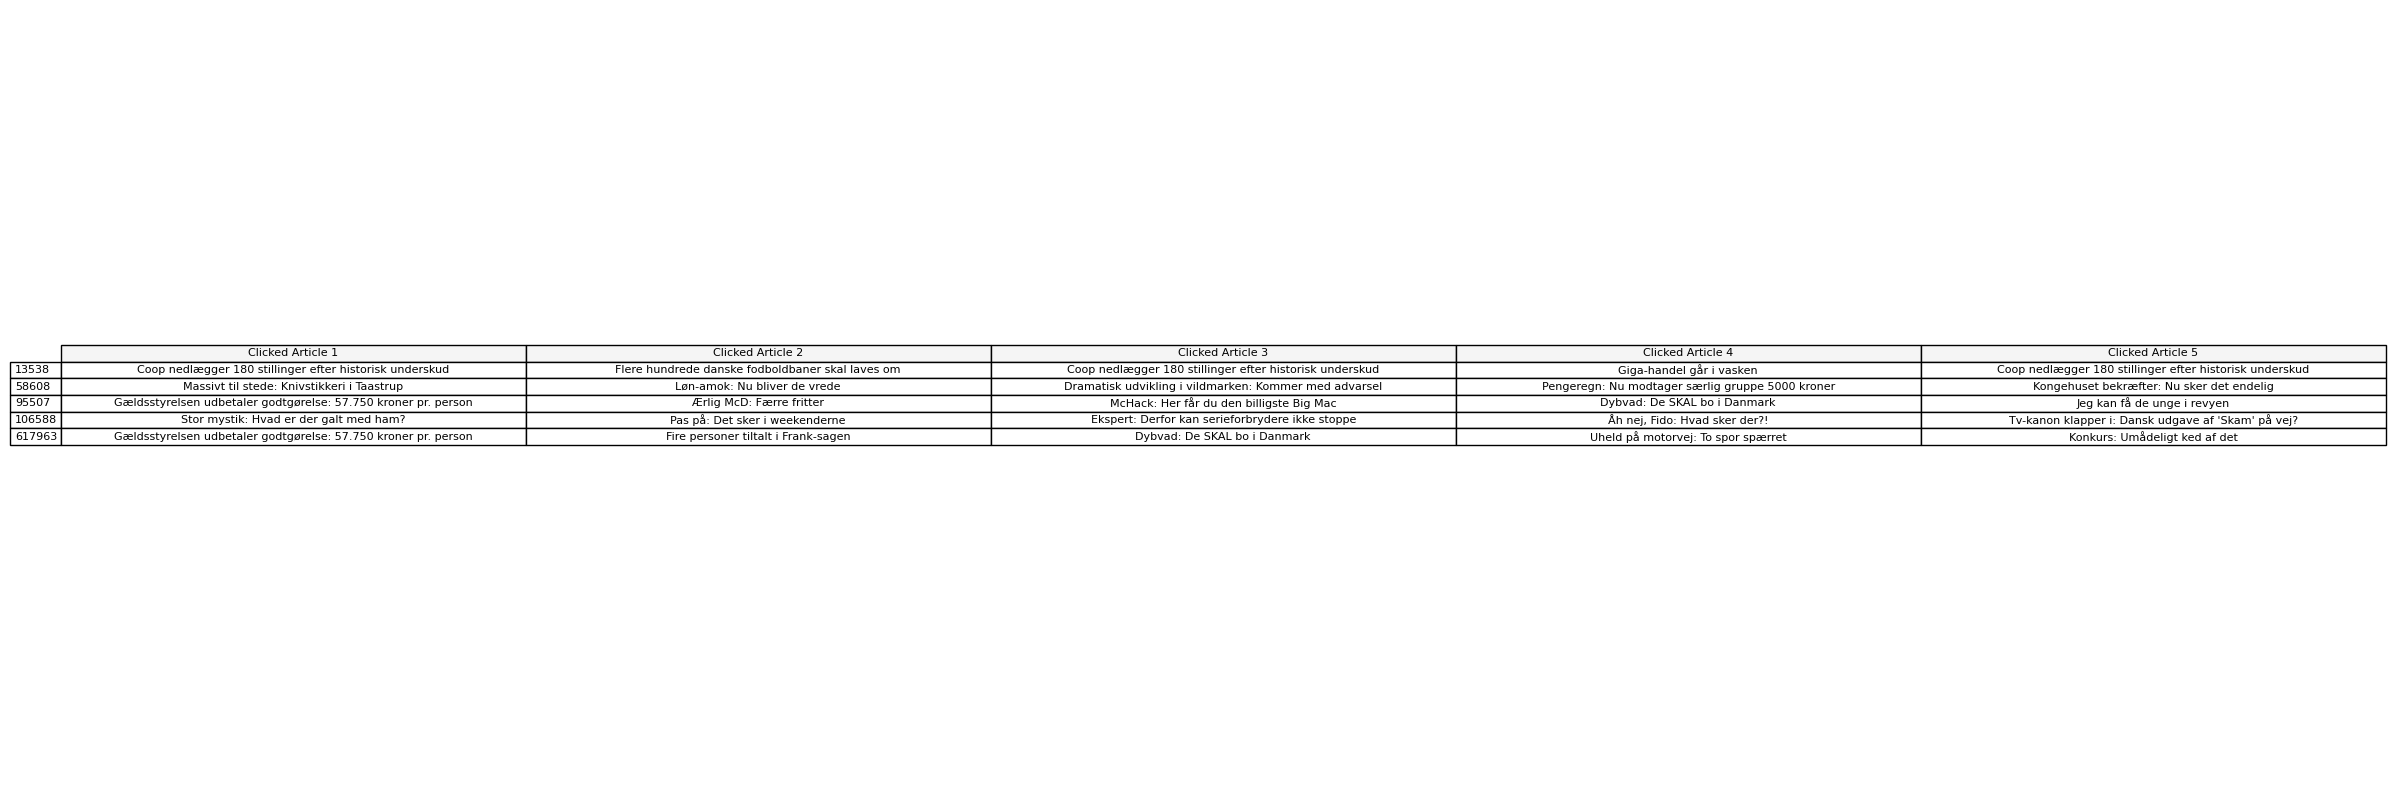

In [74]:
import matplotlib.pyplot as plt

file_path = 'eb_nerd_train_infor_his.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the first 5 entries
first_5_entries = {k: v[:5] for k, v in list(data.items())[:5]}

# Convert to a DataFrame for better visualization
df = pd.DataFrame.from_dict(first_5_entries, orient='index')

# Rename columns for better readability
df.columns = [f'Clicked Article {i+1}' for i in range(df.shape[1])]
df.index.name = 'User ID'

# Display the DataFrame as a table and save it as a PNG
plt.figure(figsize=(30, 10))
plt.axis('off')
tbl = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center', colColours=['#f5f5f5']*df.shape[1])

# Save the table as a PNG image
plt.savefig('first_5_entries_table_from_file.png')

# Show the plot
plt.show()